# Imports

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image
from scipy import stats
from sklearn.model_selection import train_test_split
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor


from sklearn.ensemble import ExtraTreesClassifier

# Helper functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    sns.set()
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Load functions

In [3]:
df5 = pd.read_csv('data/df4.csv')

In [4]:
df5.head()

,id,gender,age,region_code,policy_sales_channel,previously_insured,annual_premium,vintage,vehicle_age,vehicle_damage,response
0,1,0,0.369231,28.0,26.0,0,0.585862,0.716263,3,1,1
1,2,0,0.861538,3.0,26.0,0,0.124508,0.598616,2,0,0
2,3,0,0.415385,28.0,26.0,0,0.441814,0.058824,3,1,1
3,4,0,0.015385,11.0,152.0,1,-0.203401,0.667820,1,0,0
4,5,1,0.138462,41.0,152.0,1,-0.278293,0.100346,1,0,0


In [5]:
df5.dtypes

id                        int64
gender                    int64
age                     float64
region_code             float64
policy_sales_channel    float64
previously_insured        int64
annual_premium          float64
vintage                 float64
vehicle_age               int64
vehicle_damage            int64
response                  int64
dtype: object

# Split data frame

In [6]:
train, val = train_test_split(df5,test_size=0.2,stratify=df5['response'],random_state=42)

In [7]:
# train dataframes
X_train = train
y_train = X_train['response']

# validation dataframes
x_val = val
y_val = val['response']

# Feature Selection

## Boruta

In [8]:
# training and teste dataset for boruta
X_train_n = X_train.drop(columns=['id','response']).values
y_train_n = y_train.values.ravel()

#define RandonForestRegressor
rf = RandomForestRegressor(n_jobs=-1)

In [9]:
# boruta
#boruta = BorutaPy(rf,n_estimators='auto',verbose=2,random_state=42).fit(X_train_n,y_train_n)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	7
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	7
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	7
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	7
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	7
Iteration: 	17 / 

In [11]:
cols_selected = boruta.support_.tolist()

x_train_fs = X_train.drop(columns=['id','response'])
cols_selected_boruta = x_train_fs.iloc[:,cols_selected]

cols_not_selected_boruta = list(np.setdiff1d(x_train_fs.columns, cols_selected_boruta))

In [12]:
cols_selected_boruta.columns

Index(['vehicle_damage'], dtype='object')

In [ ]:
cols_selected_boruta_final = ['vehicle_damage']

## Feature importance

In [17]:
etf = ExtraTreesClassifier(n_estimators=100,criterion="entropy",max_features='sqrt')

In [18]:
X_train_etf = X_train.drop(columns=['id','response'])
etf.fit(X_train_etf,y_train)

ExtraTreesClassifier(criterion='entropy')

In [19]:
etf.feature_importances_

array([0.00531063, 0.12984885, 0.10076338, 0.06492919, 0.13311627,
       0.21187972, 0.24238578, 0.02109506, 0.09067111])

In [20]:
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        etf.estimators_],
                                        axis = 0)

In [68]:
ft_values = pd.Series(data=feature_importance_normalized,name='ft')
ft_names = pd.Series(data=X_train_etf.columns)
aux = {'feature':ft_names,'values':ft_values}
feature_import = pd.DataFrame(aux)
feature_import = feature_import.sort_values(by=['values'],ascending=False)


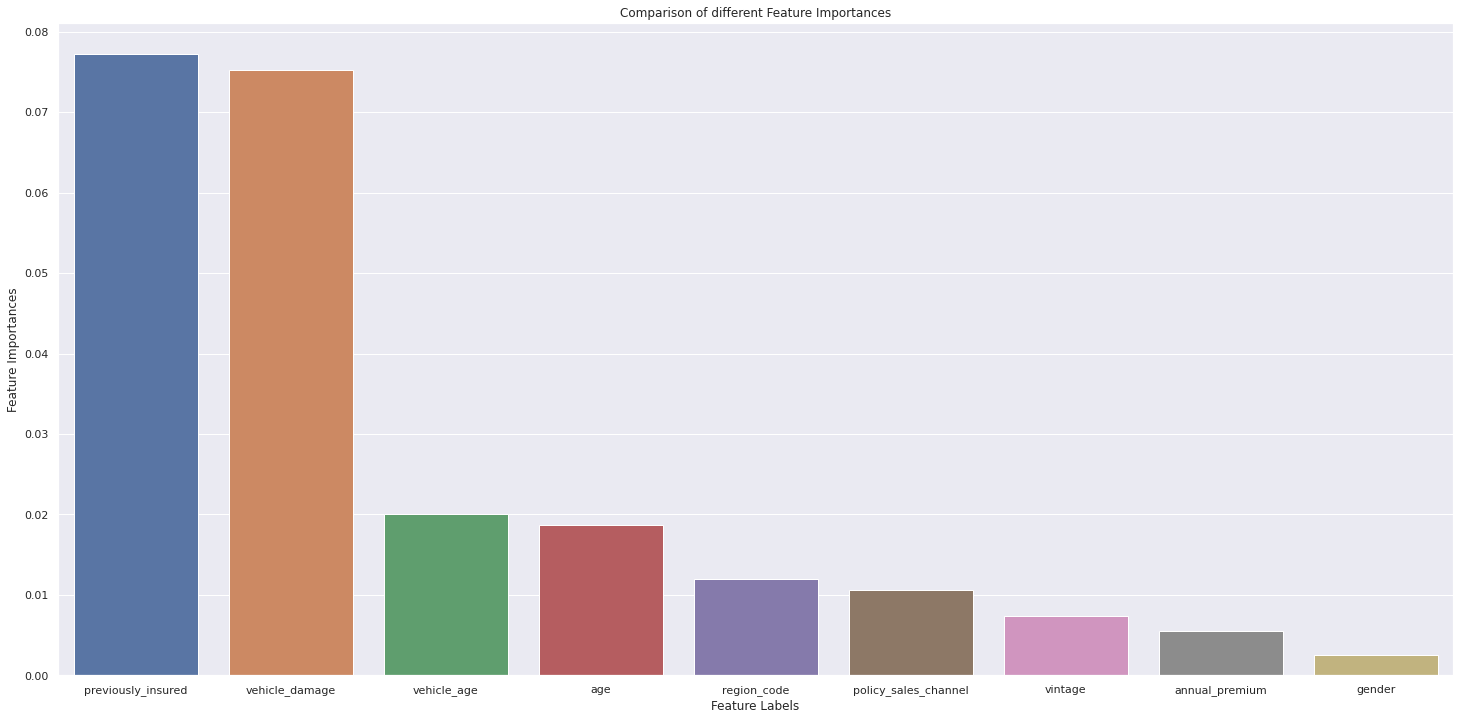

In [69]:
sns.barplot(x='feature',y='values',data=feature_import)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3161d838-98a4-47ed-ae81-127ad2068af4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>